In [1]:
%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
from __future__ import division, print_function # 引入3.x版本的除法和打印
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
# 在notebook中显示绘图结果
%matplotlib inline

# 设置一些全局的资源参数，可以进行个性化修改
import matplotlib
# 设置图片尺寸 14" x 7"
# rc: resource configuration
matplotlib.rc('figure', figsize = (14, 7))
# 设置字体 14
matplotlib.rc('font', size = 14)
# 不显示顶部和右侧的坐标线
matplotlib.rc('axes.spines', top = False, right = False)
# 不显示网格
matplotlib.rc('axes', grid = False)
# 设置背景颜色是白色
matplotlib.rc('axes', facecolor = 'white')

# 练习1：航班乘客变化分析

分析年度乘客总量变化情况（折线图）

In [5]:
data = sns.load_dataset("flights")
data.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


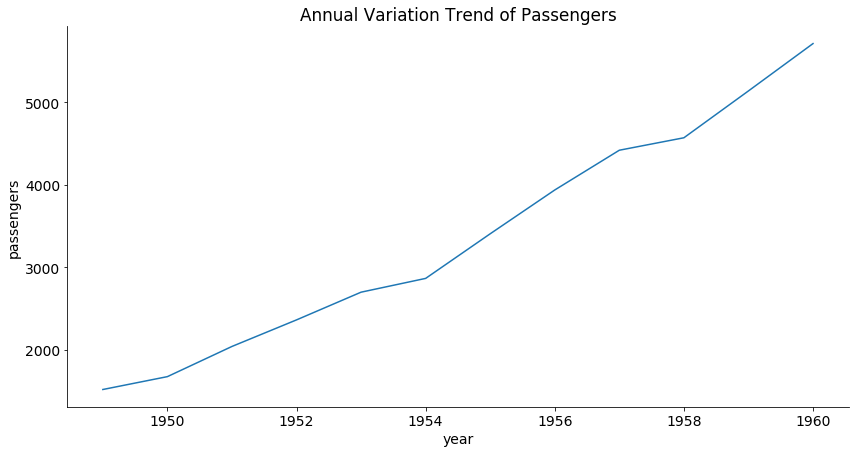

In [6]:
year_group=data.groupby('year').sum()
def lineplot1(x_data, y_data, x_label, y_label, title):
    _, ax1 = plt.subplots()
    ax1.plot(x_data,y_data)
    ax1.set_ylabel(y_label)
    ax1.set_xlabel(x_label)
    ax1.set_title(title)
lineplot1(x_data = year_group.index,y_data = year_group['passengers'],x_label = 'year',y_label = 'passengers',title = 'Annual Variation Trend of Passengers')

分析乘客在一年中各月份的分布（柱状图）

Text(0.5,1,'Monthly Distribution of Passengers')

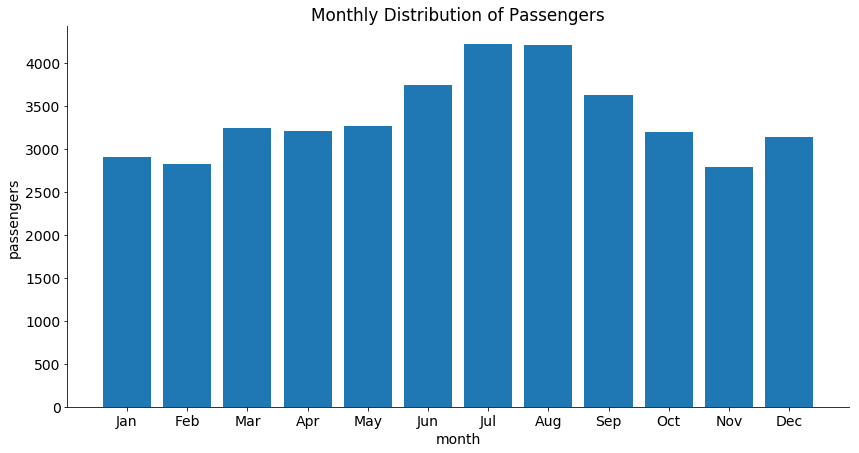

In [7]:
month_group = data.groupby('month').sum()
month_group['month_num']=range(12)
fig1,ax1=plt.subplots()
ax1.bar(month_group['month_num'],month_group['passengers'],align='center')
ax1.set_xlabel('month')
ax1.set_ylabel('passengers')
ax1.set_xticks(range(12))
month_names=[str[:3] for str in list(month_group.index)]
ax1.set_xticklabels(month_names)
ax1.set_title('Monthly Distribution of Passengers')

# 练习2：鸢尾花花型尺寸分析

In [8]:
data = sns.load_dataset("iris")
data.head()
# 萼片长度，萼片宽度，花瓣长度，花瓣宽度，种类

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


萼片（sepal）和花瓣（petal）的大小关系（散点图）

In [9]:
#尺寸为长乘以宽
data['sepal_size']=data['sepal_length']*data['sepal_width']
data['petal_size']=data['petal_length']*data['petal_width']

Text(0,0.5,'size of petal')

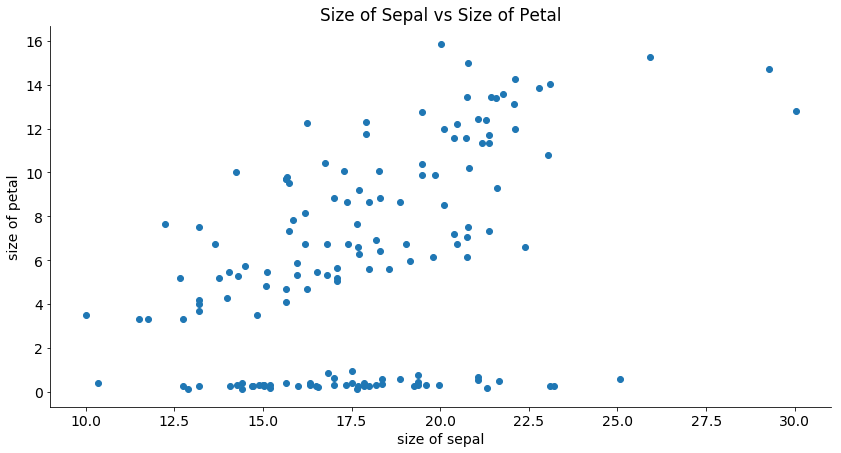

In [10]:
fig,ax2_1 = plt.subplots()
ax2_1.scatter(data['sepal_size'],data['petal_size'])
ax2_1.set_title('Size of Sepal vs Size of Petal')
ax2_1.set_xlabel('size of sepal')
ax2_1.set_ylabel('size of petal')

不同种类（species）鸢尾花萼片和花瓣的大小关系（分类散点子图）

In [18]:
species=data['species'].unique()
species

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [16]:
data1 = data[data['species'] == species[0]]
data2 = data[data['species'] == species[1]]
data3 = data[data['species'] == species[2]]

Text(0,0.5,'size of petal')

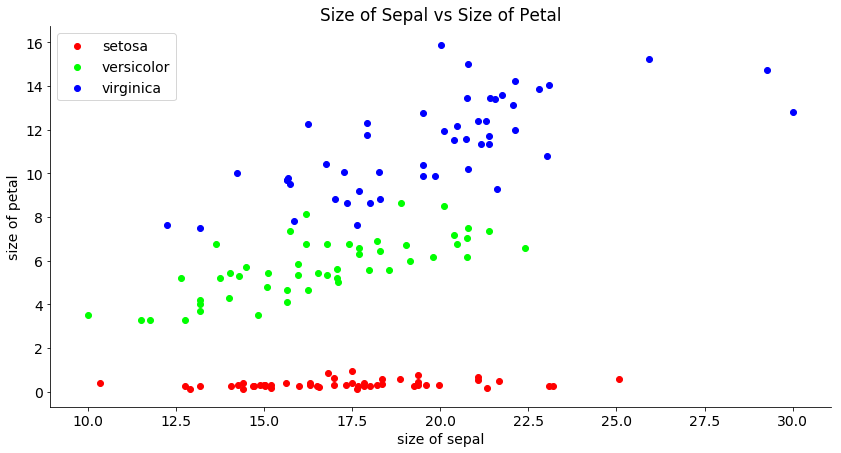

In [26]:
fig,ax2_2 = plt.subplots()

ax2_2.scatter(data1['sepal_size'],data1['petal_size'],color = '#ff0000',label = species[0])
ax2_2.scatter(data2['sepal_size'],data2['petal_size'],color = '#00ff00',label = species[1])
ax2_2.scatter(data3['sepal_size'],data3['petal_size'],color = '#0000ff',label = species[2])
ax2_2.legend(loc = 'best')

ax2_2.set_title('Size of Sepal vs Size of Petal')
ax2_2.set_xlabel('size of sepal')
ax2_2.set_ylabel('size of petal')

不同种类鸢尾花萼片和花瓣大小的分布情况（柱状图或者箱式图）

In [30]:
def boxplot(x_data, y_data, base_color, median_color, x_label, y_label, title):
    _, ax2_3 = plt.subplots()
    ax2_3.boxplot(y_data
               # 箱子是否颜色填充
               , patch_artist = True
               # 中位数线颜色
               , medianprops = {'color': base_color}
               # 箱子颜色设置，color：边框颜色，facecolor：填充颜色
               , boxprops = {'color': base_color, 'facecolor': median_color}
               # 猫须颜色whisker
               , whiskerprops = {'color': median_color}
               # 猫须界限颜色whisker cap
               , capprops = {'color': base_color})
    # 箱图与x_data保持一致
    ax2_3.set_xticklabels(x_data)
    ax2_3.set_ylabel(y_label)
    ax2_3.set_xlabel(x_label)
    ax2_3.set_title(title)

花萼片分布情况

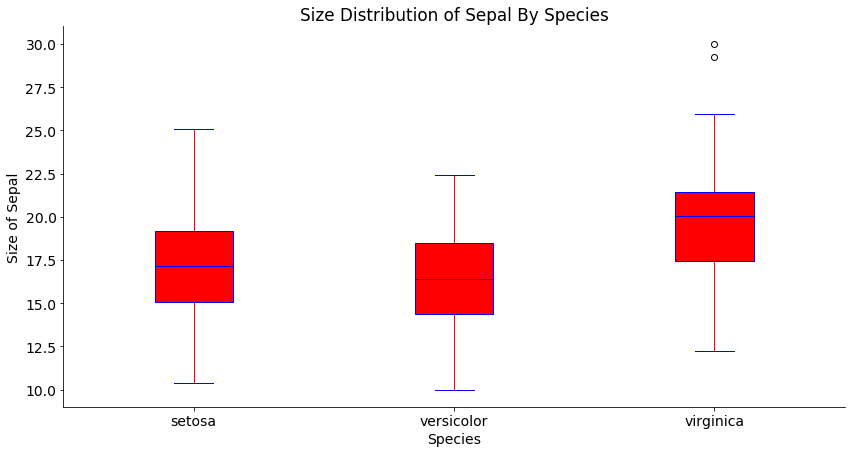

In [32]:
bp_data=[data1['sepal_size'],data2['sepal_size'],data3['sepal_size']]

# 调用绘图函数
boxplot(x_data = species
        , y_data = bp_data
        , base_color = 'b'
        , median_color = 'r'
        , x_label = 'Species'
        , y_label = 'Size of Sepal'
        , title = 'Size Distribution of Sepal By Species')

花瓣分布情况

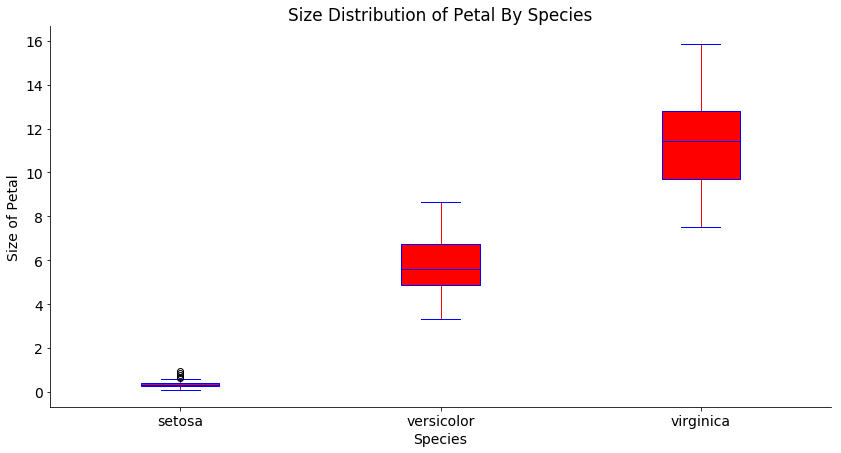

In [33]:
bp_data=[data1['petal_size'],data2['petal_size'],data3['petal_size']]

# 调用绘图函数
boxplot(x_data = species
        , y_data = bp_data
        , base_color = 'b'
        , median_color = 'r'
        , x_label = 'Species'
        , y_label = 'Size of Petal'
        , title = 'Size Distribution of Petal By Species')

# 练习3：餐厅小费情况分析

In [35]:
data = sns.load_dataset("tips")
data.head()
# 总消费，小费，性别，吸烟与否，就餐星期，就餐时间，就餐人数

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


小费和总消费之间的关系（散点图）

Text(0,0.5,'tip')

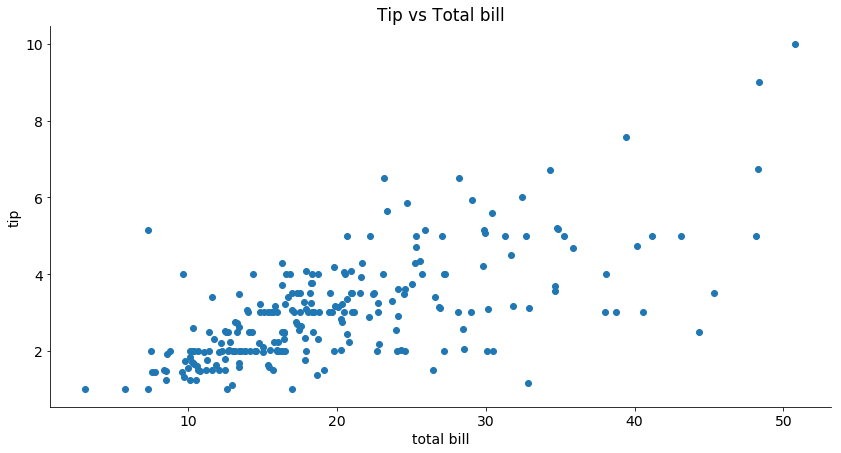

In [37]:
fig,ax3_1 = plt.subplots()
ax3_1.scatter(data['total_bill'],data['tip'])
ax3_1.set_title('Tip vs Total bill')
ax3_1.set_xlabel('total bill')
ax3_1.set_ylabel('tip')

男性顾客和女性顾客，谁更慷慨（分类箱式图）

In [39]:
sex = data['sex'].unique()
sex

[Female, Male]
Categories (2, object): [Female, Male]

D:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


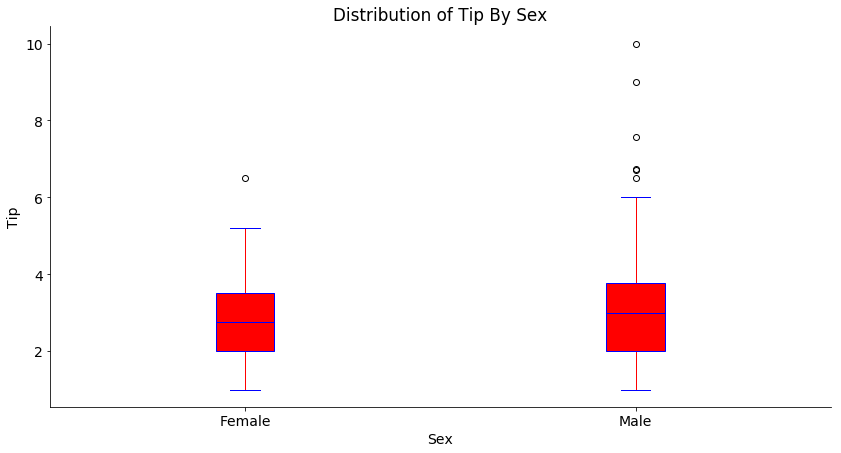

In [40]:
bp_data=[data[data['sex']==sex[0]]['tip'],data[data['sex']==sex[1]]['tip']]

# 调用绘图函数
boxplot(x_data = sex
        , y_data = bp_data
        , base_color = 'b'
        , median_color = 'r'
        , x_label = 'Sex'
        , y_label = 'Tip'
        , title = 'Distribution of Tip By Sex')

抽烟与否是否会对小费金额产生影响（分类箱式图）

[No, Yes]
Categories (2, object): [No, Yes]


D:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


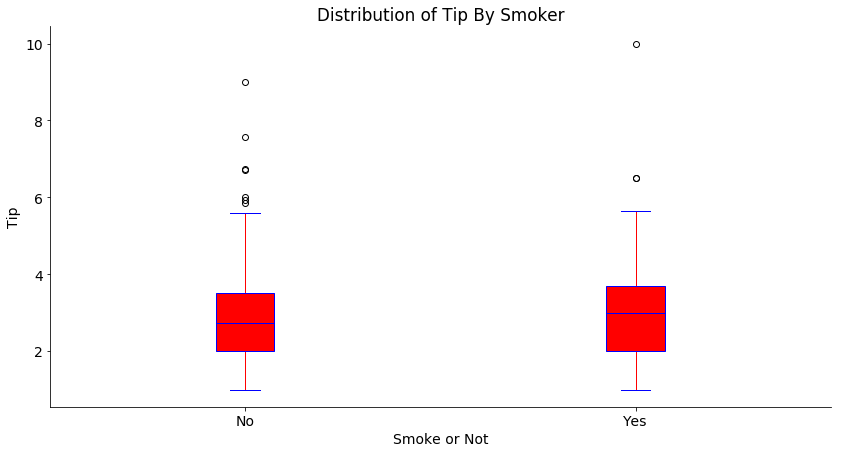

In [42]:
smoker = data['smoker'].unique()
print(smoker)
bp_data=[data[data['smoker']==smoker[0]]['tip'],data[data['smoker']==smoker[1]]['tip']]
boxplot(x_data = smoker
        , y_data = bp_data
        , base_color = 'b'
        , median_color = 'r'
        , x_label = 'Smoke or Not'
        , y_label = 'Tip'
        , title = 'Distribution of Tip By Smoker')

工作日和周末，什么时候顾客给的小费更慷慨（分类箱式图）

In [47]:
day=data['day'].unique()
print(day)

[Sun, Sat, Thur, Fri]
Categories (4, object): [Sun, Sat, Thur, Fri]


D:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


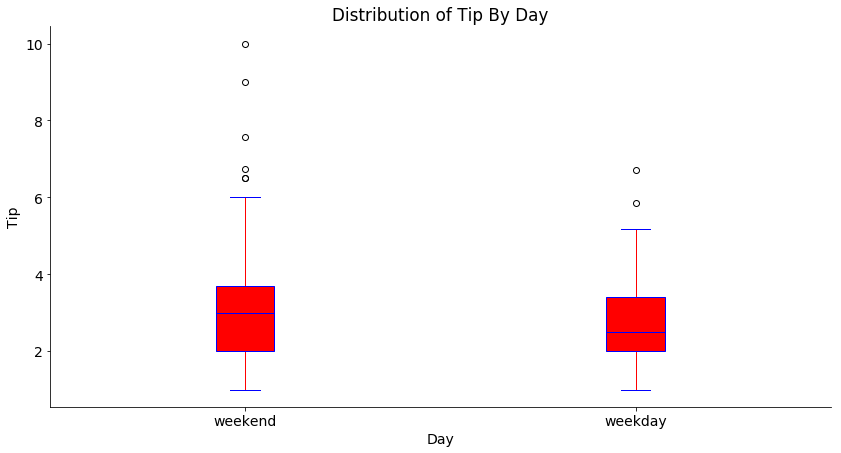

In [48]:
bp_data=[data[data['day'].isin(day[:2])]['tip'],data[data['day'].isin(day[2:4])]['tip']]

# 调用绘图函数
boxplot(x_data = ['weekend','weekday']
        , y_data = bp_data
        , base_color = 'b'
        , median_color = 'r'
        , x_label = 'Day'
        , y_label = 'Tip'
        , title = 'Distribution of Tip By Day')

午饭和晚饭，哪一顿顾客更愿意给小费（分类箱式图）

In [49]:
time=data['time'].unique()
print(time)

[Dinner, Lunch]
Categories (2, object): [Dinner, Lunch]


D:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


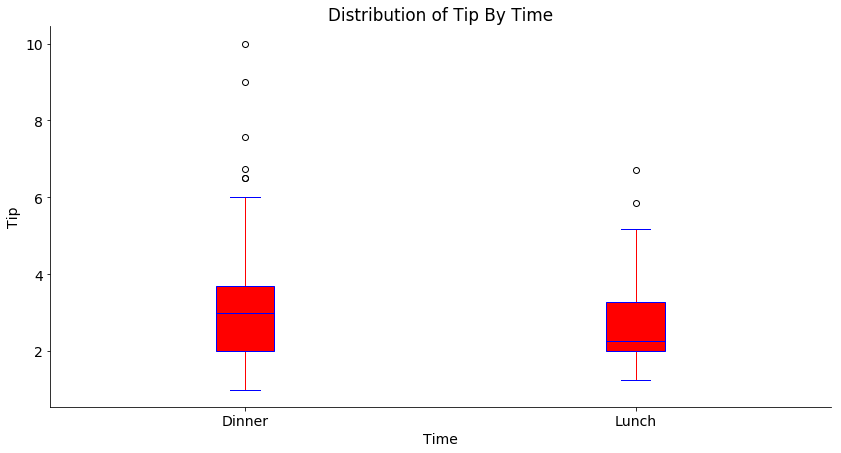

In [50]:
bp_data=[data[data['time']==time[0]]['tip'],data[data['time']==time[1]]['tip']]

boxplot(x_data = time
        , y_data = bp_data
        , base_color = 'b'
        , median_color = 'r'
        , x_label = 'Time'
        , y_label = 'Tip'
        , title = 'Distribution of Tip By Time')

就餐人数是否会对慷慨度产生影响（分类箱式图）

[1 2 3 4 5 6]


D:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


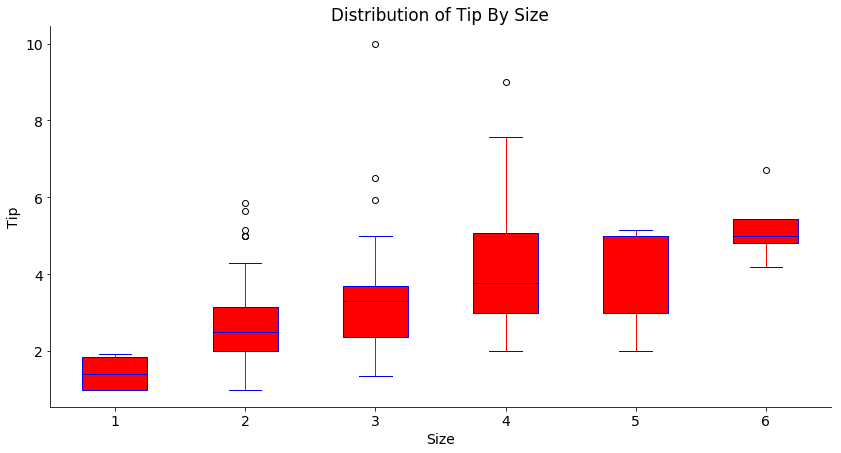

In [60]:
size=data['size'].unique()
size1 = np.sort(size)
print(size1)
bp_data=[]
for i in range(len(size1)):
    bp_data.append(data[data['size']==size1[i]]['tip'])

boxplot(x_data = size1
        , y_data = bp_data
        , base_color = 'b'
        , median_color = 'r'
        , x_label = 'Size'
        , y_label = 'Tip'
        , title = 'Distribution of Tip By Size')

性别+抽烟的组合因素对慷慨度的影响（分组柱状图）

In [65]:
tip_by_sex_smoke=data.groupby(['sex','smoker']).mean()['tip']
tip_by_sex_smoke=tip_by_sex_smoke.unstack()
tip_by_sex_smoke

smoker,Yes,No
sex,,
Male,3.051167,3.113402
Female,2.931515,2.773519


[Text(0,0,'Male'), Text(0,0,'Female')]

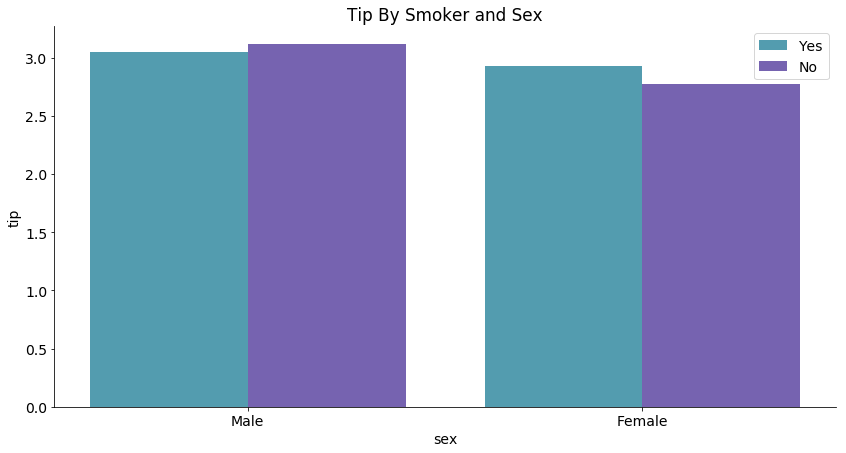

In [71]:
# 绘制分组柱状图的函数
def groupedbarplot(x_data, y_data_list, y_data_names, colors, x_label, y_label,title):
    _, ax = plt.subplots()
    # 设置每一组柱状图的宽度
    total_width = 0.8
    # 设置每一个柱状图的宽度
    ind_width = total_width / len(y_data_list)
    # 计算每一个柱状图的中心偏移
    alteration = np.arange(-total_width/2+ind_width/2, total_width/2+ind_width/2, ind_width)

    # 分别绘制每一个柱状图
    for i in range(0, len(y_data_list)):
        # 横向散开绘制
        ax.bar(x_data + alteration[i], y_data_list[i], color = colors[i], label = y_data_names[i], width = ind_width)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    ax.legend(loc = 'upper right')



# 调用绘图函数
groupedbarplot(x_data = range(2)
               , y_data_list = [tip_by_sex_smoke['Yes'],tip_by_sex_smoke['No']]
               , y_data_names = ['Yes', 'No']
               , colors = ['#539caf', '#7663b0']
               , x_label = 'sex'
               , y_label = 'tip'
               ,title = 'Tip By Smoker and Sex')
ax=plt.gca()
ax.set_xticks(range(2))
ax.set_xticklabels(tip_by_sex_smoke.index.values)

# 练习4：泰坦尼克号海难幸存状况分析

In [29]:
data = sns.load_dataset("titanic")
data.head()
# 幸存与否，仓位等级，性别，年龄，堂兄弟姐妹数，父母子女数，票价，上船港口缩写，仓位等级，人员分类，是否成年男性，所在甲板，上船港口，是否幸存，是否单独乘船

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


不同仓位等级中幸存和遇难的乘客比例（堆积柱状图）

In [27]:
def stackedbarplot(x_data, y_data_list, y_data_names, colors, x_label, y_label, title):
    _, ax = plt.subplots()
    # 循环绘制堆积柱状图
    for i in range(0, len(y_data_list)):
        if i == 0:
            ax.bar(x_data, y_data_list[i], color = colors[i], align = 'center', label = y_data_names[i])
        else:
            ax.bar(x_data, y_data_list[i], color = colors[i], bottom = y_data_list[i - 1], align = 'center', label = y_data_names[i])
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    ax.legend(loc = 'upper right') # 设定图例位置

In [28]:
pclass_survived=data.groupby(['pclass','survived']).size().unstack()
pclass_survived

survived,0,1
pclass,,
1,80,136
2,97,87
3,372,119


In [29]:
pclass_survived['sum']=pclass_survived[0]+pclass_survived[1]
pclass_survived['yes_prop']=pclass_survived[1]/pclass_survived['sum']
pclass_survived['no_prop']=pclass_survived[0]/pclass_survived['sum']
pclass_survived

survived,0,1,sum,yes_prop,no_prop
pclass,,,,,
1,80,136,216,0.629630,0.370370
2,97,87,184,0.472826,0.527174
3,372,119,491,0.242363,0.757637


In [26]:
# 调用绘图函数
stackedbarplot(x_data = pclass_survived.index.values
               , y_data_list = [pclass_survived['yes_prop'], pclass_survived['no_prop']]
               , y_data_names = ['Survived', 'Not survived']
               , colors = ['#539caf', '#7663b0']
               , x_label = 'Pclass'
               , y_label = 'Number of People'
               , title = 'Number of People By Survived Or Not and Pclass')

ax=plt.gca()
ax.set_xticks(range(1,4))
ax.set_xticklabels(pclass_survived.index.values)

NameError: name 'stackedbarplot' is not defined

不同性别的幸存比例（堆积柱状图）

In [31]:
sex_survived=data.groupby(['sex','survived']).size().unstack()
sex_survived

survived,0,1
sex,,
female,81,233
male,468,109


In [32]:
sex_survived['sum']=sex_survived[0]+sex_survived[1]
sex_survived['yes_prop']=sex_survived[1]/sex_survived['sum']
sex_survived['no_prop']=sex_survived[0]/sex_survived['sum']
sex_survived

survived,0,1,sum,yes_prop,no_prop
sex,,,,,
female,81,233,314,0.742038,0.257962
male,468,109,577,0.188908,0.811092


[Text(0,0,'female'), Text(0,0,'male')]

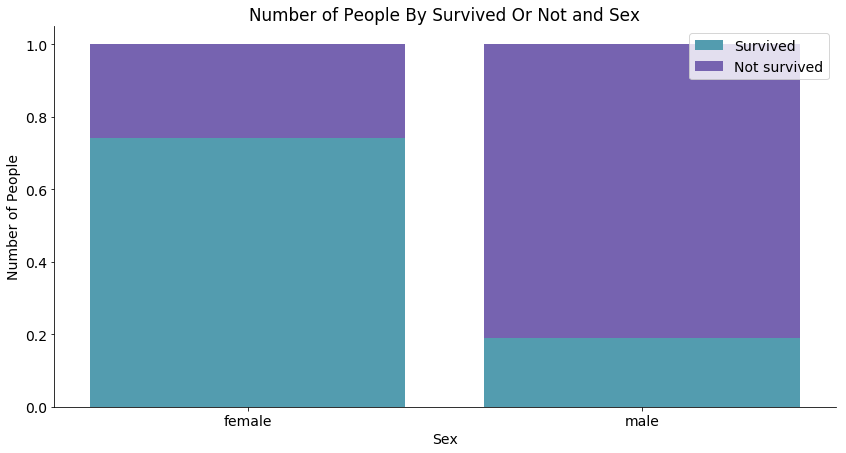

In [38]:
# 调用绘图函数
stackedbarplot(x_data = range(2)
               , y_data_list = [sex_survived['yes_prop'], sex_survived['no_prop']]
               , y_data_names = ['Survived', 'Not survived']
               , colors = ['#539caf', '#7663b0']
               , x_label = 'Sex'
               , y_label = 'Number of People'
               , title = 'Number of People By Survived Or Not and Sex')
ax=plt.gca()
ax.set_xticks(range(2))
ax.set_xticklabels(sex_survived.index.values)

幸存和遇难乘客的票价分布（分类箱式图）

In [3]:
def boxplot(x_data, y_data, base_color, median_color, x_label, y_label, title):
    _, ax2_3 = plt.subplots()
    ax2_3.boxplot(y_data
               # 箱子是否颜色填充
               , patch_artist = True
               # 中位数线颜色
               , medianprops = {'color': base_color}
               # 箱子颜色设置，color：边框颜色，facecolor：填充颜色
               , boxprops = {'color': base_color, 'facecolor': median_color}
               # 猫须颜色whisker
               , whiskerprops = {'color': median_color}
               # 猫须界限颜色whisker cap
               , capprops = {'color': base_color})
    # 箱图与x_data保持一致
    ax2_3.set_xticklabels(x_data)
    ax2_3.set_ylabel(y_label)
    ax2_3.set_xlabel(x_label)
    ax2_3.set_title(title)

In [38]:
survived=data['survived'].unique()
print(survived)
bp_data=[data[data['survived']==survived[0]]['fare'],data[data['survived']==survived[1]]['fare']]

[0 1]


D:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


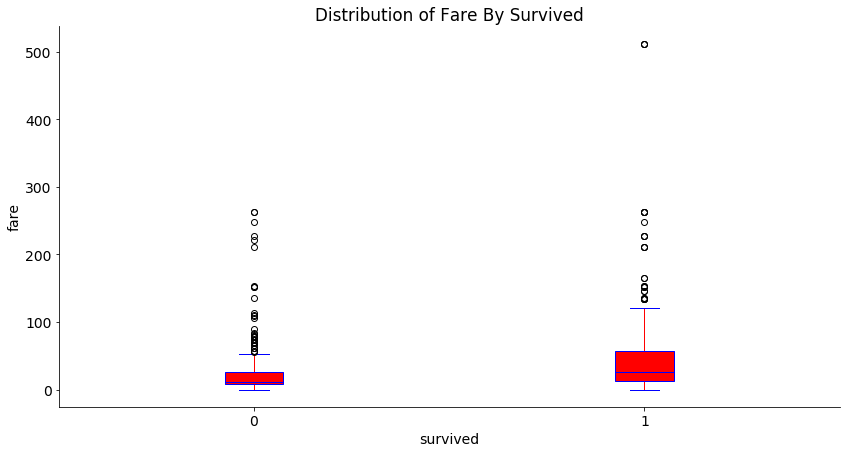

In [39]:
boxplot(x_data = survived
        , y_data = bp_data
        , base_color = 'b'
        , median_color = 'r'
        , x_label = 'survived'
        , y_label = 'fare'
        , title = 'Distribution of Fare By Survived')

幸存和遇难乘客的年龄分布（分类箱式图）

In [8]:
age=data['age'].unique()
print(age)
data['age'].fillna(0,inplace=True)
survived=data['survived'].unique()
print(survived)
bp_data=[data[data['survived']==survived[0]]['age'],data[data['survived']==survived[1]]['age']]

[22.   38.   26.   35.    0.   54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]
[0 1]


D:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


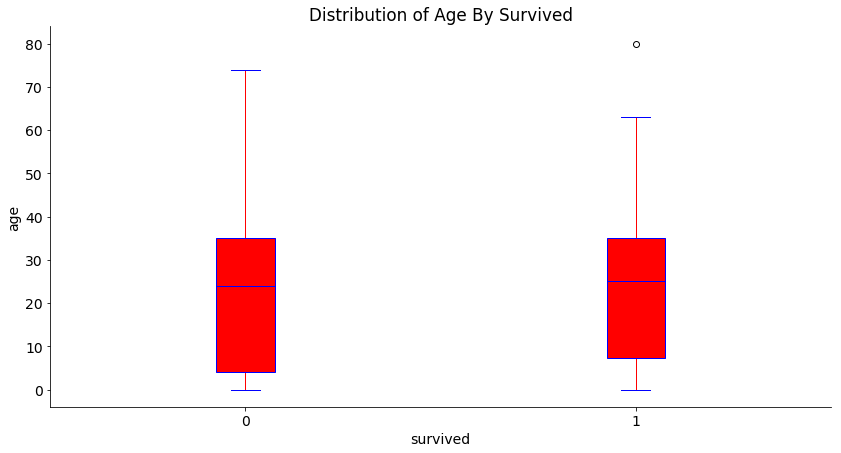

In [9]:
boxplot(x_data=survived
        , y_data = bp_data
        , base_color = 'b'
        , median_color = 'r'
        , x_label = 'survived'
        , y_label = 'age'
        , title = 'Distribution of Age By Survived')

不同上船港口的乘客仓位等级分布（分组柱状图）

In [10]:
embark_pclass=data.groupby(['embark_town','pclass']).size().unstack()
embark_pclass.fillna(0,inplace=True)
embark_pclass

pclass,1,2,3
embark_town,,,
Cherbourg,85,17,66
Queenstown,2,3,72
Southampton,127,164,353


In [19]:
#pclass_list=[embark_pclass.iloc[:,0],embark_pclass.iloc[:,1],embark_pclass.iloc[:,2]]
pclass_list=[embark_pclass[1],embark_pclass[2],embark_pclass[3]]
pclass_list

[embark_town
 Cherbourg       85
 Queenstown       2
 Southampton    127
 Name: 1, dtype: int64, embark_town
 Cherbourg       17
 Queenstown       3
 Southampton    164
 Name: 2, dtype: int64, embark_town
 Cherbourg       66
 Queenstown      72
 Southampton    353
 Name: 3, dtype: int64]

[Text(0,0,'Cherbourg'), Text(0,0,'Queenstown'), Text(0,0,'Southampton')]

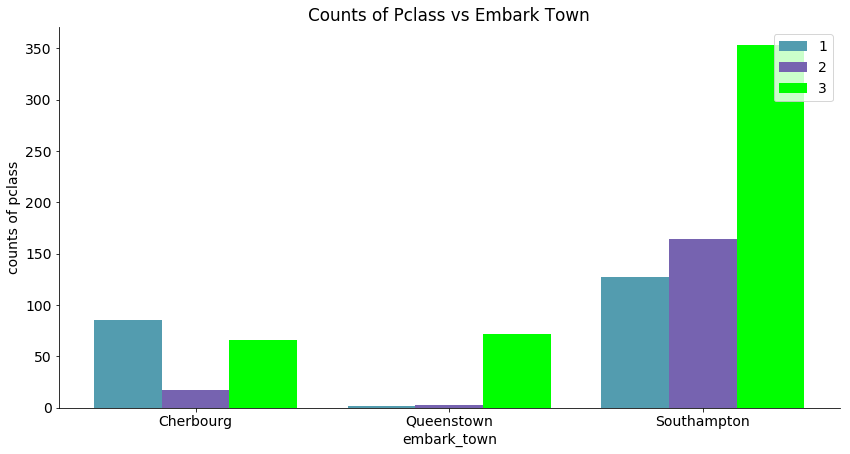

In [37]:
# 绘制分组柱状图的函数
def groupedbarplot(x_data, y_data_list, y_data_names, colors, x_label, y_label,title):
    _, ax = plt.subplots()
    # 设置每一组柱状图的宽度
    total_width = 0.8
    # 设置每一个柱状图的宽度
    ind_width = total_width / len(y_data_list)
    # 计算每一个柱状图的中心偏移
    alteration = np.arange(-total_width/2+ind_width/2, total_width/2+ind_width/2, ind_width)

    # 分别绘制每一个柱状图
    for i in range(0, len(y_data_list)):
        # 横向散开绘制
        ax.bar(x_data + alteration[i], y_data_list[i], color = colors[i], label = y_data_names[i], width = ind_width)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    ax.legend(loc = 'upper right')

groupedbarplot(x_data = range(3)
               , y_data_list = pclass_list
               , y_data_names = embark_pclass.columns
               , colors = ['#539caf', '#7663b0','#00ff00']
               , x_label = 'embark_town'
               , y_label = 'counts of pclass'
               ,title = 'Counts of Pclass vs Embark Town')

ax=plt.gca()
ax.set_xticks(range(3))
ax.set_xticklabels(embark_pclass.index.values)

幸存和遇难乘客堂兄弟姐妹的数量分布（分类箱式图）

In [41]:
survived=data['survived'].unique()
print(survived)
bp_data=[data[data['survived']==survived[0]]['sibsp'],data[data['survived']==survived[1]]['sibsp']]

[0 1]


D:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


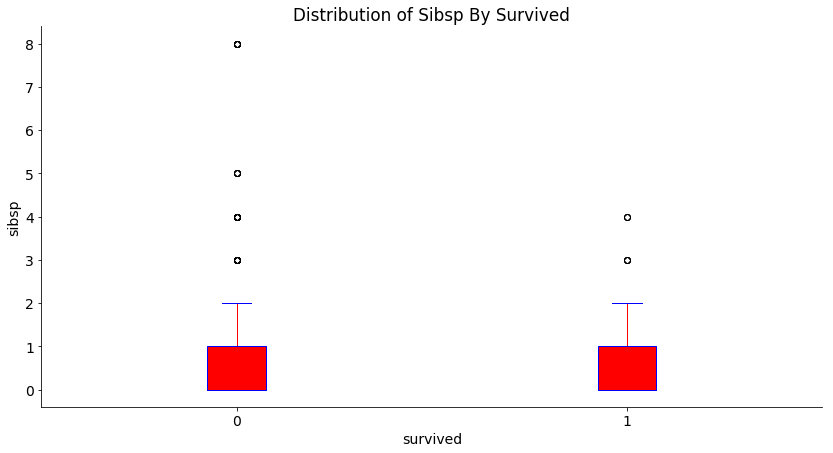

In [42]:
boxplot(x_data=survived
        , y_data = bp_data
        , base_color = 'b'
        , median_color = 'r'
        , x_label = 'survived'
        , y_label = 'sibsp'
        , title = 'Distribution of Sibsp By Survived')

幸存和遇难乘客父母子女的数量分布（分类箱式图）

In [43]:
survived=data['survived'].unique()
print(survived)
bp_data=[data[data['survived']==survived[0]]['parch'],data[data['survived']==survived[1]]['parch']]

[0 1]


D:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


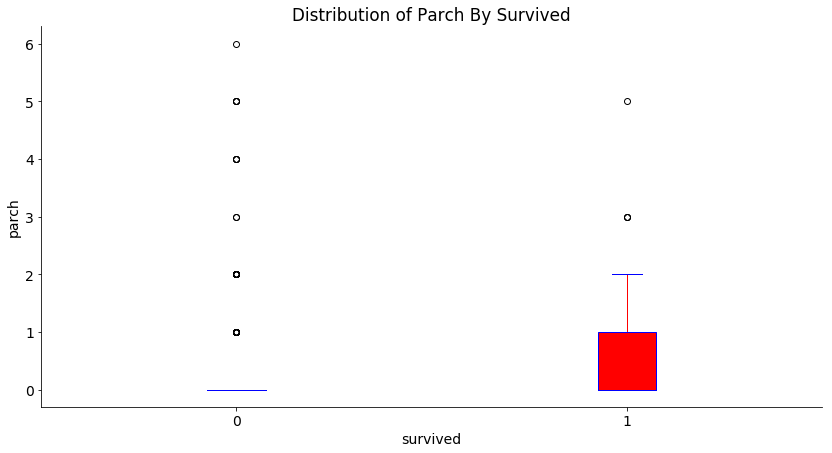

In [44]:
boxplot(x_data=survived
        , y_data = bp_data
        , base_color = 'b'
        , median_color = 'r'
        , x_label = 'survived'
        , y_label = 'parch'
        , title = 'Distribution of Parch By Survived')

单独乘船与否和幸存之间有没有联系（堆积柱状图或者分组柱状图）

In [45]:
alone_survived=data.groupby(['alone','survived']).size().unstack()
alone_survived

survived,0,1
alone,,
False,175,179
True,374,163


[Text(0,0,'False'), Text(0,0,'True')]

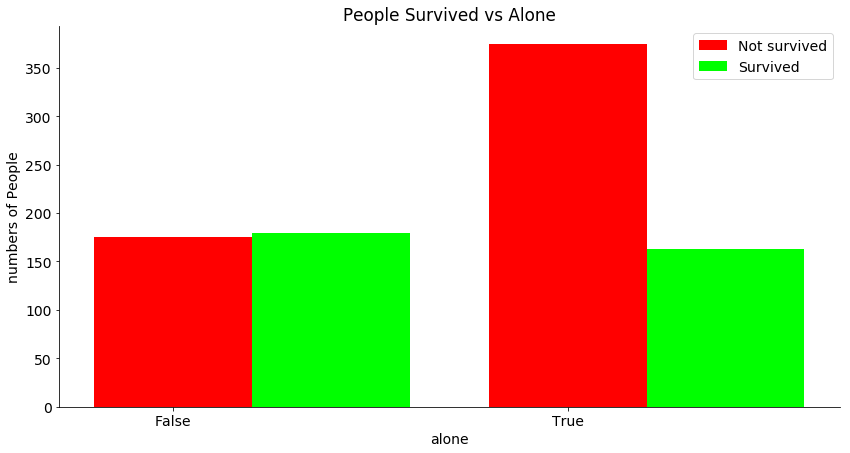

In [53]:
_, ax = plt.subplots()
width=0.4
index=alone_survived.index.values
ax.bar(index, alone_survived[0], color = '#ff0000', label = 'Not survived', width = width)
ax.bar(index+width, alone_survived[1], color = '#00ff00', label = 'Survived', width = width)

ax.set_ylabel('numbers of People')
ax.set_xlabel('alone')
ax.set_title('People Survived vs Alone')
ax.legend(loc = 'upper right')
#plt.xticks(index+width,index)
ax.set_xticks(range(2))
ax.set_xticklabels(index)